RECCOMMENDATION SYSTEMS


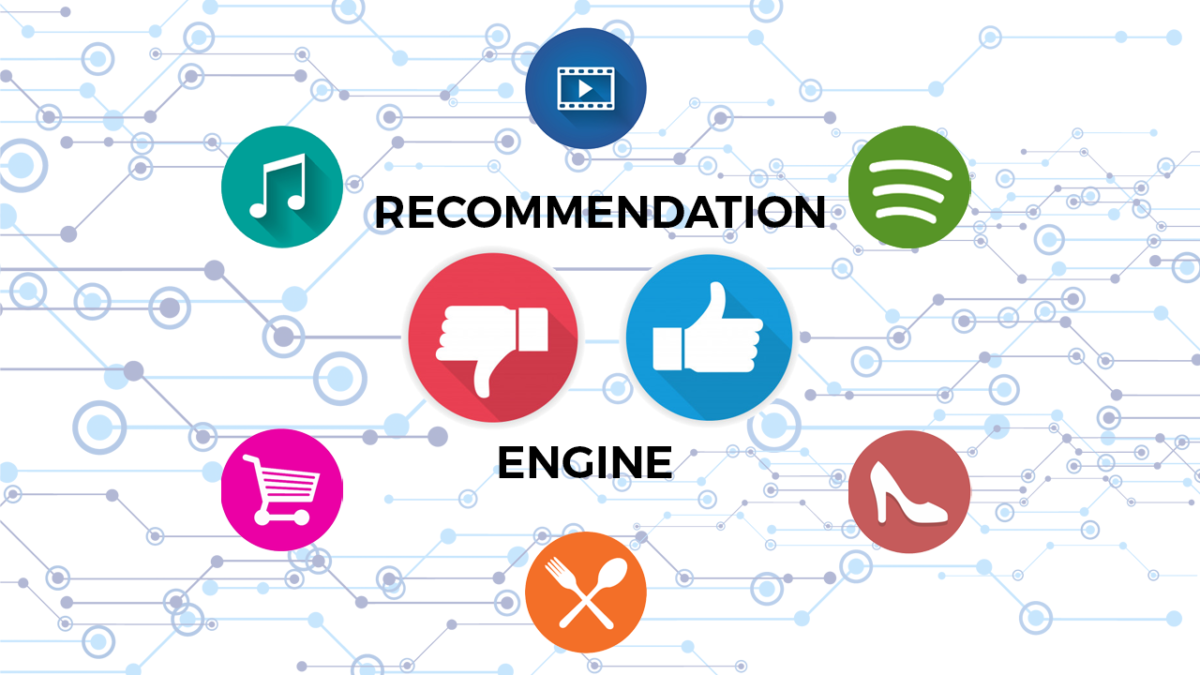

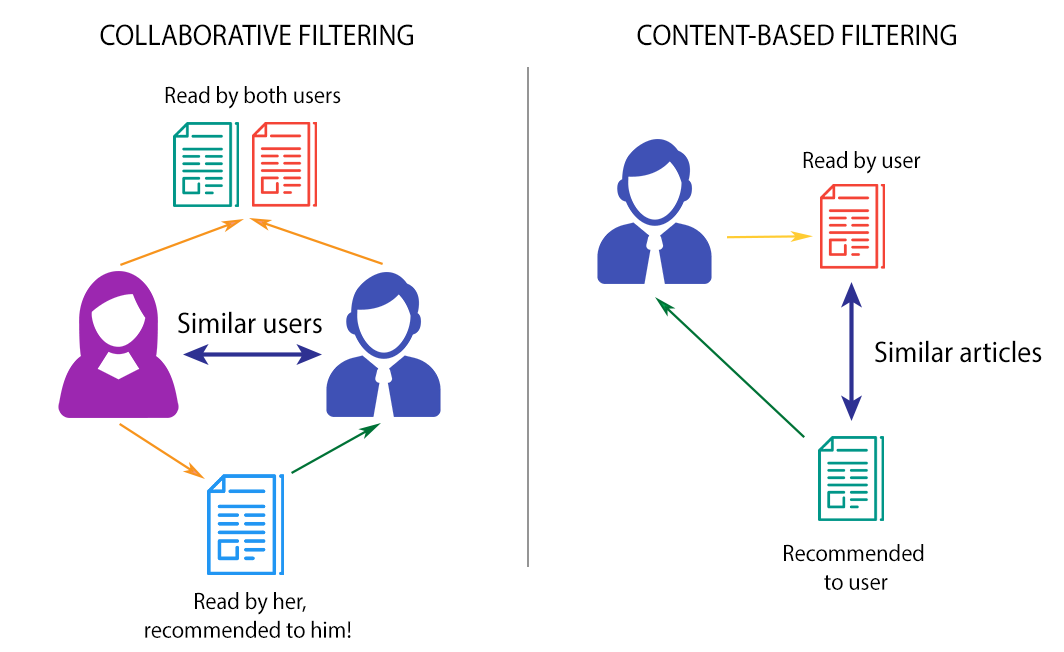

CONTENT BASED

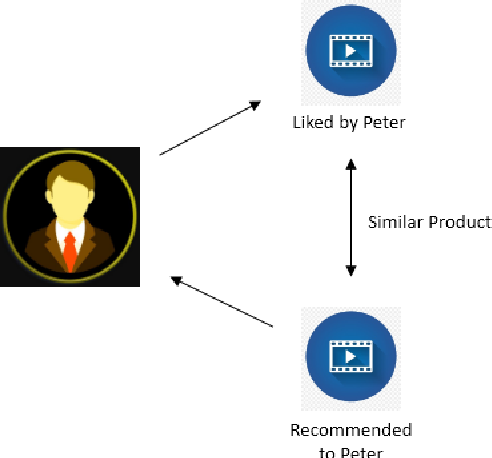

COLLABORATIVE FILTERING

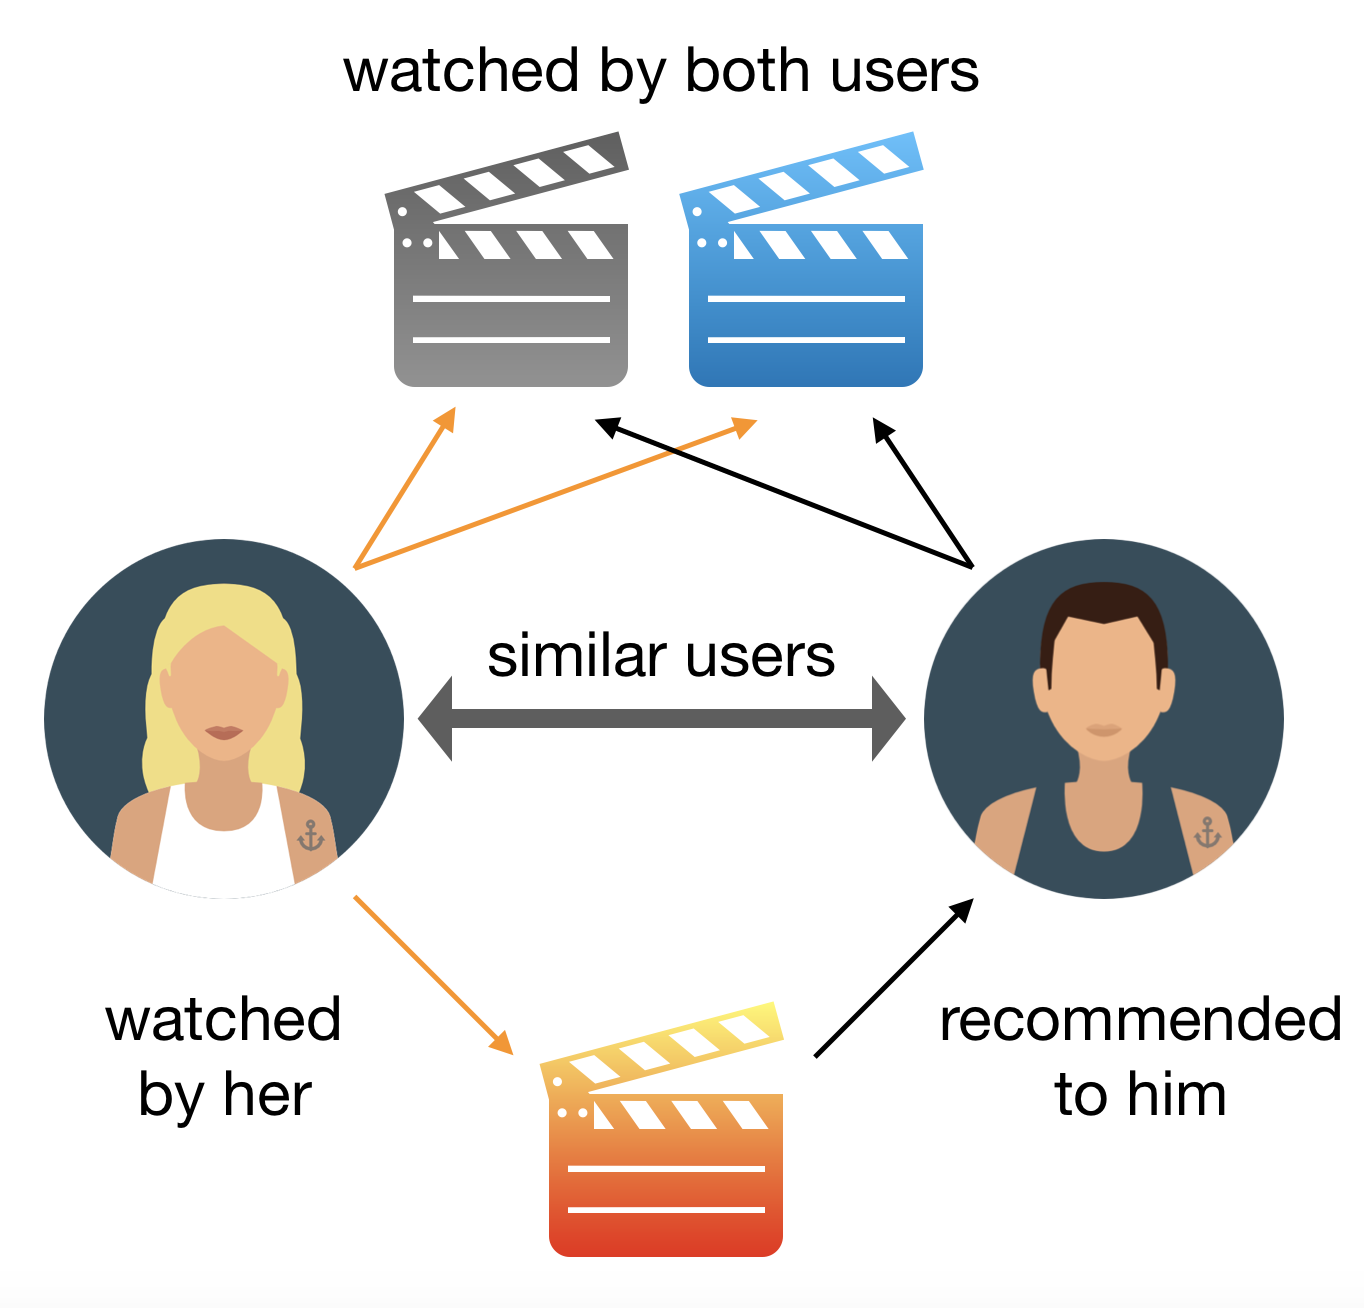

In [48]:
#################  Building a Movie Content Based Recommendation System

In [49]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to the dataset
movies_df = pd.read_csv("/content/drive/MyDrive/DEPI/Movies/tmdb_movies_data.csv")
movies_df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/1966,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/1966,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/1966,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/1966,22,5.4,1966,0.000000e+00,0.000000e+00


In [50]:
print("Movies Dataframe:",movies_df.shape)

Movies Dataframe: (10866, 21)


In [51]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [52]:
movies_df = movies_df.drop_duplicates(subset='director', keep='first')


recommendations based on the movie’s plot summaries given in the overview column. So if our user gives us a movie title, our goal is to recommend movies that share similar plot summaries.

In [53]:
movies_df.head(1)['overview']

0    Twenty-two years after the events of Jurassic ...
Name: overview, dtype: object

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer with specified parameters
tfv = TfidfVectorizer(
    min_df=3,  # Ignore terms that have a document frequency strictly lower than 3
    max_features=None,  # No limit on the number of features (words/tokens)
    strip_accents='unicode',  # Remove accents during preprocessing
    analyzer='word',  # Treat each word as a separate token

    ngram_range=(1, 3),  # Include unigrams, bigrams, and trigrams
    stop_words='english'  # Remove English stop words
)

# Assuming 'movies_cleaned_df' is a DataFrame containing a column 'overview'
# Filling NaNs in 'overview' column with empty string
movies_df['overview'] = movies_df['overview'].fillna('')


<ipython-input-54-13ea0c4d3327>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['overview'] = movies_df['overview'].fillna('')


In the context of text processing and feature extraction using techniques like TF-IDF (Term Frequency-Inverse Document Frequency), unigrams, bigrams, and trigrams refer to different combinations of consecutive words (or tokens) that are used to represent the text data. Here’s what each term means:





Unigrams:

Unigrams are single words. Each word in the text is treated as a separate feature.
Example: For the text "Machine learning is fascinating," the unigrams would be ["Machine", "learning", "is", "fascinating"].







Bigrams:

Bigrams are pairs of consecutive words.
Example: Using the same text, the bigrams would be ["Machine learning", "learning is", "is fascinating"].
Bigrams capture some context of word pairs in the text and can be useful for capturing phrases or combinations of words that frequently occur together.







Trigrams:

Trigrams are sequences of three consecutive words.
Example: For the text "Machine learning is fascinating," the trigrams would be ["Machine learning is", "learning is fascinating"].
Trigrams can capture even more context and are useful for capturing longer phrases or expressions that might have specific meanings in the context of the text.





strip_accents='unicode'
Preservation of Accents:

Accented characters (e.g., á, è, ö) will be preserved as they are in the text data.
This setting is useful when you want to retain the original form of text without altering or normalizing characters based on accents.

In [55]:
# Fitting the TF-IDF on the 'overview' text
tfv_matrix = tfv.fit_transform(movies_df['overview'])

In [56]:
tfv_matrix.shape

(5068, 10525)

In [57]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [58]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
cosine = cosine_similarity(tfv_matrix, tfv_matrix)

In [59]:
cosine[0]

array([1.        , 0.00751736, 0.        , ..., 0.01235878, 0.00963613,
       0.        ])

In [60]:
sig[0]

array([0.76163406, 0.76159446, 0.76159416, ..., 0.76159465, 0.76159454,
       0.76159416])

Nature of Similarity:



Cosine similarity measures directional similarity, focusing on the angle between vectors.



Sigmoid kernel measures similarity through a non-linear transformation of the dot product, capturing complex relationships.





Output Range:

Cosine similarity ranges from -1 to 1, while sigmoid kernel values are typically transformed to range between 0 and 1.






Application Context:

Cosine similarity is commonly used in NLP for tasks like document similarity and clustering.



Sigmoid kernel is utilized in kernel methods, where capturing non-linear relationships between data points is crucial.









Cosine Similarity:

Use when you want a measure of similarity that is invariant to vector magnitude and captures directional similarity.
Suitable for tasks like document clustering, information retrieval, and recommendation systems.




Sigmoid Kernel:

Use when you need to capture complex, non-linear relationships between vectors.


Useful in kernel methods for machine learning algorithms like Support Vector Machines (SVMs) and kernelized clustering algorithms.

In [61]:
# Reverse mapping of indices and movie titles
indices = pd.Series(movies_df.index, index=movies_df['director']).drop_duplicates()

In [62]:
indices

director
Colin Trevorrow         0
George Miller           1
Robert Schwentke        2
J.J. Abrams             3
James Wan               4
                    ...  
James Hill          10851
Fielder Cook        10852
Alan Rafkin         10855
Bruce Brown         10861
Harold P. Warren    10865
Length: 5068, dtype: int64

In [63]:
indices['George Miller']

1

In [64]:
sig[4]

array([0.76159416, 0.76159585, 0.76159416, ..., 0.76159416, 0.76159416,
       0.76159527])

In [65]:
list(enumerate(sig[indices['George Miller']]))

[(0, 0.7615944559175849),
 (1, 0.7616340556187579),
 (2, 0.7615941559557649),
 (3, 0.7615941559557649),
 (4, 0.7615958480207948),
 (5, 0.761595771401137),
 (6, 0.7615941559557649),
 (7, 0.7615948598826568),
 (8, 0.7615945456863604),
 (9, 0.7615948895584809),
 (10, 0.7615941559557649),
 (11, 0.7615953352810649),
 (12, 0.7615945638801679),
 (13, 0.7615941559557649),
 (14, 0.761597297485367),
 (15, 0.7615941559557649),
 (16, 0.7615947553542687),
 (17, 0.761595367302689),
 (18, 0.7615941559557649),
 (19, 0.7615941559557649),
 (20, 0.7615941559557649),
 (21, 0.7615944981010666),
 (22, 0.7615965723928341),
 (23, 0.761594986421421),
 (24, 0.7615941559557649),
 (25, 0.7615941559557649),
 (26, 0.7615949342477009),
 (27, 0.7615950271449544),
 (28, 0.7615953275899958),
 (29, 0.7615952135954743),
 (30, 0.7615970358422398),
 (31, 0.76159693923854),
 (32, 0.7615950596632308),
 (33, 0.761594529091427),
 (34, 0.7615948286047028),
 (35, 0.7615959474370695),
 (36, 0.7615941559557649),
 (37, 0.7615946317

In [66]:
sorted(list(enumerate(sig[indices['George Miller'].any()])), key=lambda x: x[1], reverse=True)

[(0,
  array([[0.76163406, 0.76159446, 0.76159416, ..., 0.76159465, 0.76159454,
          0.76159416],
         [0.76159446, 0.76163406, 0.76159416, ..., 0.76159416, 0.76159441,
          0.76159416],
         [0.76159416, 0.76159416, 0.76163406, ..., 0.76159416, 0.76159416,
          0.76159416],
         ...,
         [0.76159465, 0.76159416, 0.76159416, ..., 0.76163406, 0.76159416,
          0.76159511],
         [0.76159454, 0.76159441, 0.76159416, ..., 0.76159416, 0.76163406,
          0.76159416],
         [0.76159416, 0.76159416, 0.76159416, ..., 0.76159511, 0.76159416,
          0.76163406]]))]

In [67]:
def give_rec(title, sig=sig):
    # Get the index corresponding to original_title
    idx = indices[title]

    # Get the pairwsie similarity scores
    sig_scores = list(enumerate(sig[idx]))

    # Sort the movies
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar movies
    sig_scores = sig_scores[1:11]

    # Movie indices
    movie_indices = [i[0] for i in sig_scores]

    # Top 10 most similar movies
    return movies_df['director'].iloc[movie_indices]

In [68]:
# Testing our content-based recommendation system with the seminal film Spy Kids


give_rec('Anthony DiBlasi')

6494             Brian W. Cook
2833                Jan Harlan
9315                Al Reinert
7789                 Grant Gee
1575              Robert Vince
7384              Ronald Neame
7293              Adrian Maben
9708    Y.K. Kim|Woo-sang Park
6764                Liam Lynch
3480    Gonzalo LÃ³pez-Gallego
Name: director, dtype: object

Building a Simple Collaborative Filtering Recommendation System with TensorFlow

In [69]:
!pip install tensorflow tensorflow-recommenders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.2/96.2 kB 3.2 MB/s eta 0:00:00


In [70]:
import tensorflow_datasets as tfds
import tensorflow_recommenders as tfrs
import tensorflow as tf

In [71]:
# Load data on movie ratings and movies
ratings = tfds.load("movielens/100k-ratings", split="train")
movies = tfds.load("movielens/100k-movies", split="train")

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/100000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/movielens/100k-ratings/incomplete.E0LDD2_0.1.1/movielens-train.tfrecord*..…

Dataset movielens downloaded and prepared to /root/tensorflow_datasets/movielens/100k-ratings/0.1.1. Subsequent calls will reuse this data.


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1682 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/movielens/100k-movies/incomplete.3VPCMO_0.1.1/movielens-train.tfrecord*...…

Dataset movielens downloaded and prepared to /root/tensorflow_datasets/movielens/100k-movies/0.1.1. Subsequent calls will reuse this data.


In [72]:
# Build flexible representation models
user_model = tf.keras.Sequential([
    # Assuming user_id is categorical
    tf.keras.layers.StringLookup(),
    tf.keras.layers.Embedding(input_dim=1000, output_dim=32)
])

In [73]:
movie_model = tf.keras.Sequential([
    # Assuming movie_title is categorical
    tf.keras.layers.StringLookup(),
    tf.keras.layers.Embedding(input_dim=1000, output_dim=32)
])

In [74]:
import tensorflow as tf

# Define the user model
user_model = tf.keras.Sequential([
    # Convert user ID strings to integer indices
    tf.keras.layers.StringLookup(
        vocabulary=1000,  # Replace with the actual size of your vocabulary or None if dynamic
        mask_token=None,  # Set to 'None' if you don't want to use masking
        oov_token="[UNK]"  # Out-of-vocabulary token for handling unseen IDs
    ),
    # Embed these integer indices into dense vectors
    tf.keras.layers.Embedding(
        input_dim=1000,  # Number of unique IDs; should match the vocabulary size of StringLookup
        output_dim=32  # Dimension of the embedding vector
    )
])

# Example input
user_ids = tf.constant(['user1', 'user2', 'user3'])

# Get embeddings for the example input
embeddings = user_model(user_ids)
print(embeddings)


AttributeError: 'int' object has no attribute 'size'